# Implementasi Metodologi CRISP-DM pada Data *Campaign Marketing* Perbankan

CRISP-DM (*Cross Industry Standard Process for Data Mining*) merupakan metodologi standar untuk melakukan perencanaan dan eksekusi pada *data mining* atau *data analysis* untuk membantu pengambilan keputusan bisnis. CRISP-DM terdiri dari enam tahapan, yaitu: *Business Understanding*, *Data Understanding*, *Data Preparation*, *Modeling*, *Evaluation*, dan *Deployment*.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/800px-CRISP-DM_Process_Diagram.png" alt="Drawing" style="width: 300px;"/>

Data yang digunakan pada *notebook* ini adalah data *telemarketing* sebuah bank di Portugal, pada bulan Mei 2008 sampai November 2010 yang dapat diakses [di sini](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). Pihak bank menelpon kepada nasabah, apakah nasabah terkait akan berinvestasi pada deposito berjangka (*term deposit*) yang dipromosikan bank.

## *Business Understanding*

Berdasarkan data dan masalah yang diberikan, tujuan analisis ini adalah untuk meningkatkan efisiensi pemasaran deposito berjangka ini kepada nasabah potensial berdasarkan data-data nasabah. Pendekatan yang akan digunakan pada data adalah membuat *predictive model* berupa klasifikasi berdasarkan kategori yang ada pada data (iya-tidaknya nasabah berinvestasi pada deposito berjangka).

Dari tujuan ini, muncul pertanyaan berikut.
1. Apa *predictive model* yang paling memiliki akurasi dan performa paling baik pada kasus ini?
2. Apa saja variabel (*feature*) yang relevan pada keberhasilan pemasaran berdasarkan *predictive model* yang dibuat?

## *Data Understanding*

Berdasarkan informasi pada [*link* ini](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing), data terdiri atas 20 variabel *input* dan satu variabel *output*. Rinciannya adalah sebagai berikut.

#### Variabel *input*:
\# Data nasabah bank:
1. age : usia nasabah
2. job : jenis pekerjaan (*categorical*: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
3. marital : status pernikahan (*categorical*: 'divorced', 'married', 'single', 'unknown')
4. education : pendidikan terakhir (*categorical*: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
5. default: pernah memiliki riwayat gagal bayar (*credit in default*)? (*categorical*: 'no', 'yes', 'unknown')
6. housing: pernah mengajukan kredit agunan rumah (*housing loan*)? (*categorical*: 'no', 'yes', 'unknown')
7. loan: pernah mengajukan pinjaman pribadi (*personal loan*)? (*categorical*: 'no', 'yes', 'unknown')

\# Data yang berhubungan dengan kontak sebelumnya terkait *marketing campaign* ini:
8. contact: media komunikasi yang digunakan (*categorical*: 'cellular', 'telephone')
9. month: bulan saat kontak sebelumnya (*categorical*: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: hari saat kontak sebelumnya (*categorical*: 'mon', 'tue', 'wed', 'thu', 'fri')
11. duration: lamanya kontak, dalam detik (*numeric*)

\# Data lainnya:
12. campaign: banyaknya kontak yang dilakukan pada nasabah terkait pada *marketing campaign* ini (*numeric*, termasuk kontak terakhir)
13. pdays: jumlah hari yang berlalu setelah nasabah terakhir dihubungi (*numeric*; 999 berarti nasabah belum pernah dihubungi sebelumnya)
14. previous: banyaknya kontak yang dilakukan pada nasabah terkait sebelum *marketing campaign* ini (*numeric*)
15. poutcome: hasil *marketing campaign* sebelumnya (*categorical*: 'failure', 'nonexistent', 'success')

\# Data sosial dan ekonomi
16. emp.var.rate: *Employment Variation Rate* - indikator kuartalan (*numeric*)
17. cons.price.idx: *Consumer Price Index* - indikator bulanan (*numeric*)
18. cons.conf.idx: *Consumer Confidence Index* - indikator bulanan (*numeric*)
19. euribor3m: kurs suku bunga Euribor 3 bulan - indikator harian (*numeric*)
20. nr.employed: jumlah pekerja - indikator kuartalan (*numeric*)

#### Variabel *output*:
21. y - apakah nasabah berinvestasi pada deposito berjangka yang ditawarkan? (*binary*: 'yes', 'no')

In [1]:
import warnings
warnings.filterwarnings("ignore")

Data yang dipilih oleh penulis adalah bank-additional-full.csv yang dapat diakses [di sini](https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip).

In [2]:
import requests, zipfile, io, os

# Data import from provided URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip'
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
z.close()
os.listdir()

['.ipynb_checkpoints',
 'bank-additional',
 'Gabriel Powericho Luo Daely - Prosa.ai Test.ipynb',
 '__MACOSX']

In [3]:
os.listdir('./bank-additional/')

['.DS_Store',
 '.Rhistory',
 'bank-additional-full.csv',
 'bank-additional-names.txt',
 'bank-additional.csv']

Data diimpor dan dieksplorasi informasi jenis data tiap kolom variabel serta banyaknya indeks dan variabel seperti berikut ini.

In [4]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('./bank-additional/bank-additional-full.csv',sep=';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Dilakukan deskripsi statistik untuk melihat persebaran data.

In [6]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Selanjutnya, akan dicari berapa banyak data kosong (*NaN values*) pada masing-masing variabel untuk melihat kualitas data.

In [7]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Dari hasil di atas, tidak ada *NaN values* pada data. Berdasarkan keterangan data, data yang kosong atau tidak diketahui diisi '*unknown*'.

In [8]:
a = data[data=='unknown'].count()
b = data[data!='unknown'].count()
c = data.count()
d = round(a/c*100,2)
e = round(b/c*100,2)
f = round(c/c*100,2)
pd.concat([a,b,c,d,e,f],axis=1).rename(columns={0: "# of Unknown Data", 
                                                1: "# of Known Data",
                                                2: "# of Total Data",
                                                3: "% of Unknown Data",
                                                4: "% of Known Data",
                                                5: "% of Total Data", })

,# of Unknown Data,# of Known Data,# of Total Data,% of Unknown Data,% of Known Data,% of Total Data
age,0,41188,41188,0.00,100.00,100.0
job,330,40858,41188,0.80,99.20,100.0
marital,80,41108,41188,0.19,99.81,100.0
education,1731,39457,41188,4.20,95.80,100.0
default,8597,32591,41188,20.87,79.13,100.0
housing,990,40198,41188,2.40,97.60,100.0
loan,990,40198,41188,2.40,97.60,100.0
contact,0,41188,41188,0.00,100.00,100.0
month,0,41188,41188,0.00,100.00,100.0
day_of_week,0,41188,41188,0.00,100.00,100.0


Cek apakah ada data yang terduplikasi atau tidak.

In [9]:
data[data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


Kemudian, dicari *unique values* tiap variabel kategori untuk mengonfirmasi informasi yang telah didapat sebelumnya.

In [10]:
for obj in data.select_dtypes(include='object'):
    print(obj + ' contains: ' + str(data[obj].unique()))

print('\nNumber of unique values in each categorical/object feature')
print(data.select_dtypes(include='object').nunique())

job contains: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital contains: ['married' 'single' 'divorced' 'unknown']
education contains: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default contains: ['no' 'unknown' 'yes']
housing contains: ['no' 'yes' 'unknown']
loan contains: ['no' 'yes' 'unknown']
contact contains: ['telephone' 'cellular']
month contains: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week contains: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome contains: ['nonexistent' 'failure' 'success']
y contains: ['no' 'yes']

Number of unique values in each categorical/object feature
job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: i

Tampilkan histogram pada masing-masing kolom variabel numerik.

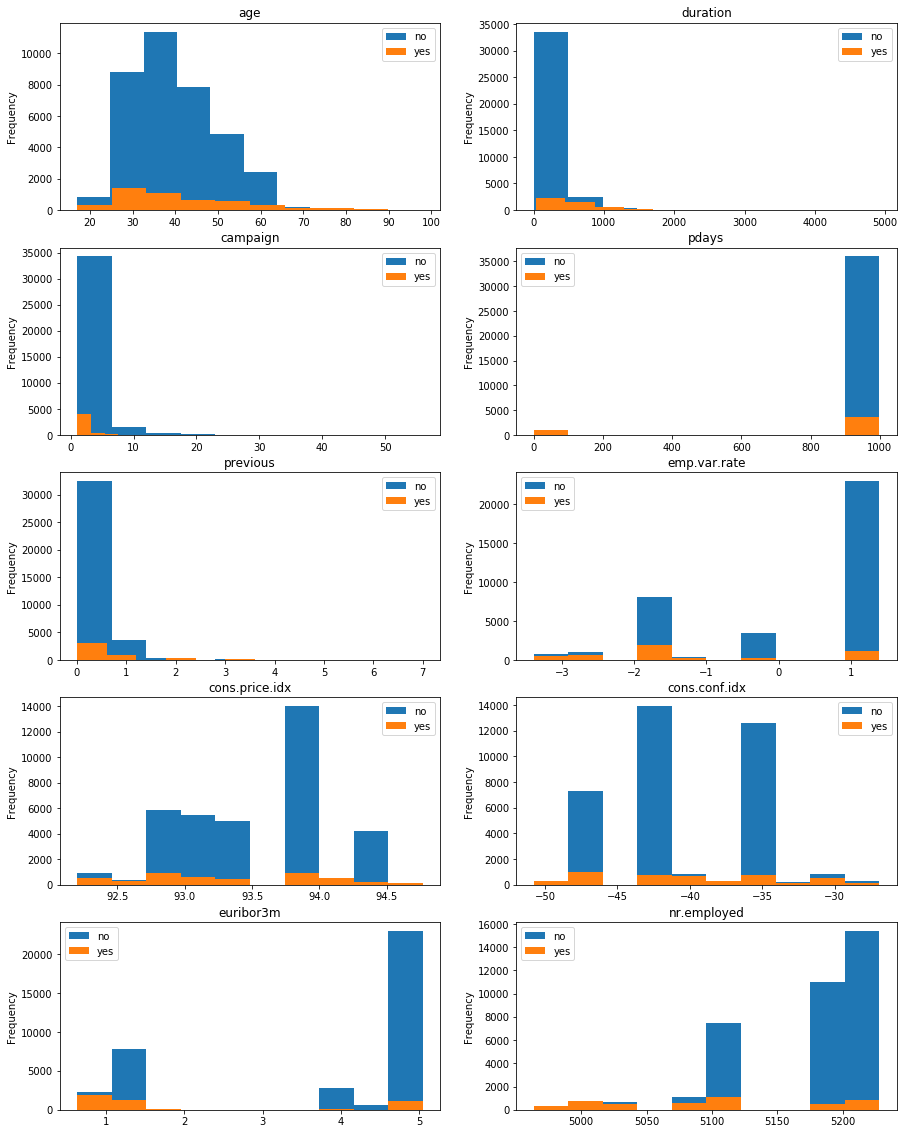

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

n = len(data.select_dtypes(include='number').columns)
i = 0
for col in data.select_dtypes(include='number').columns.values:
    plt.subplot(n//2,2,i+1)
    data.groupby('y')[col].plot(kind='hist',stacked=True,figsize=(15,20))
    plt.gca().set_title(col)
    plt.legend()
    i += 1
plt.show()

Buat *bar plot* untuk tiap kolom variabel kategori.

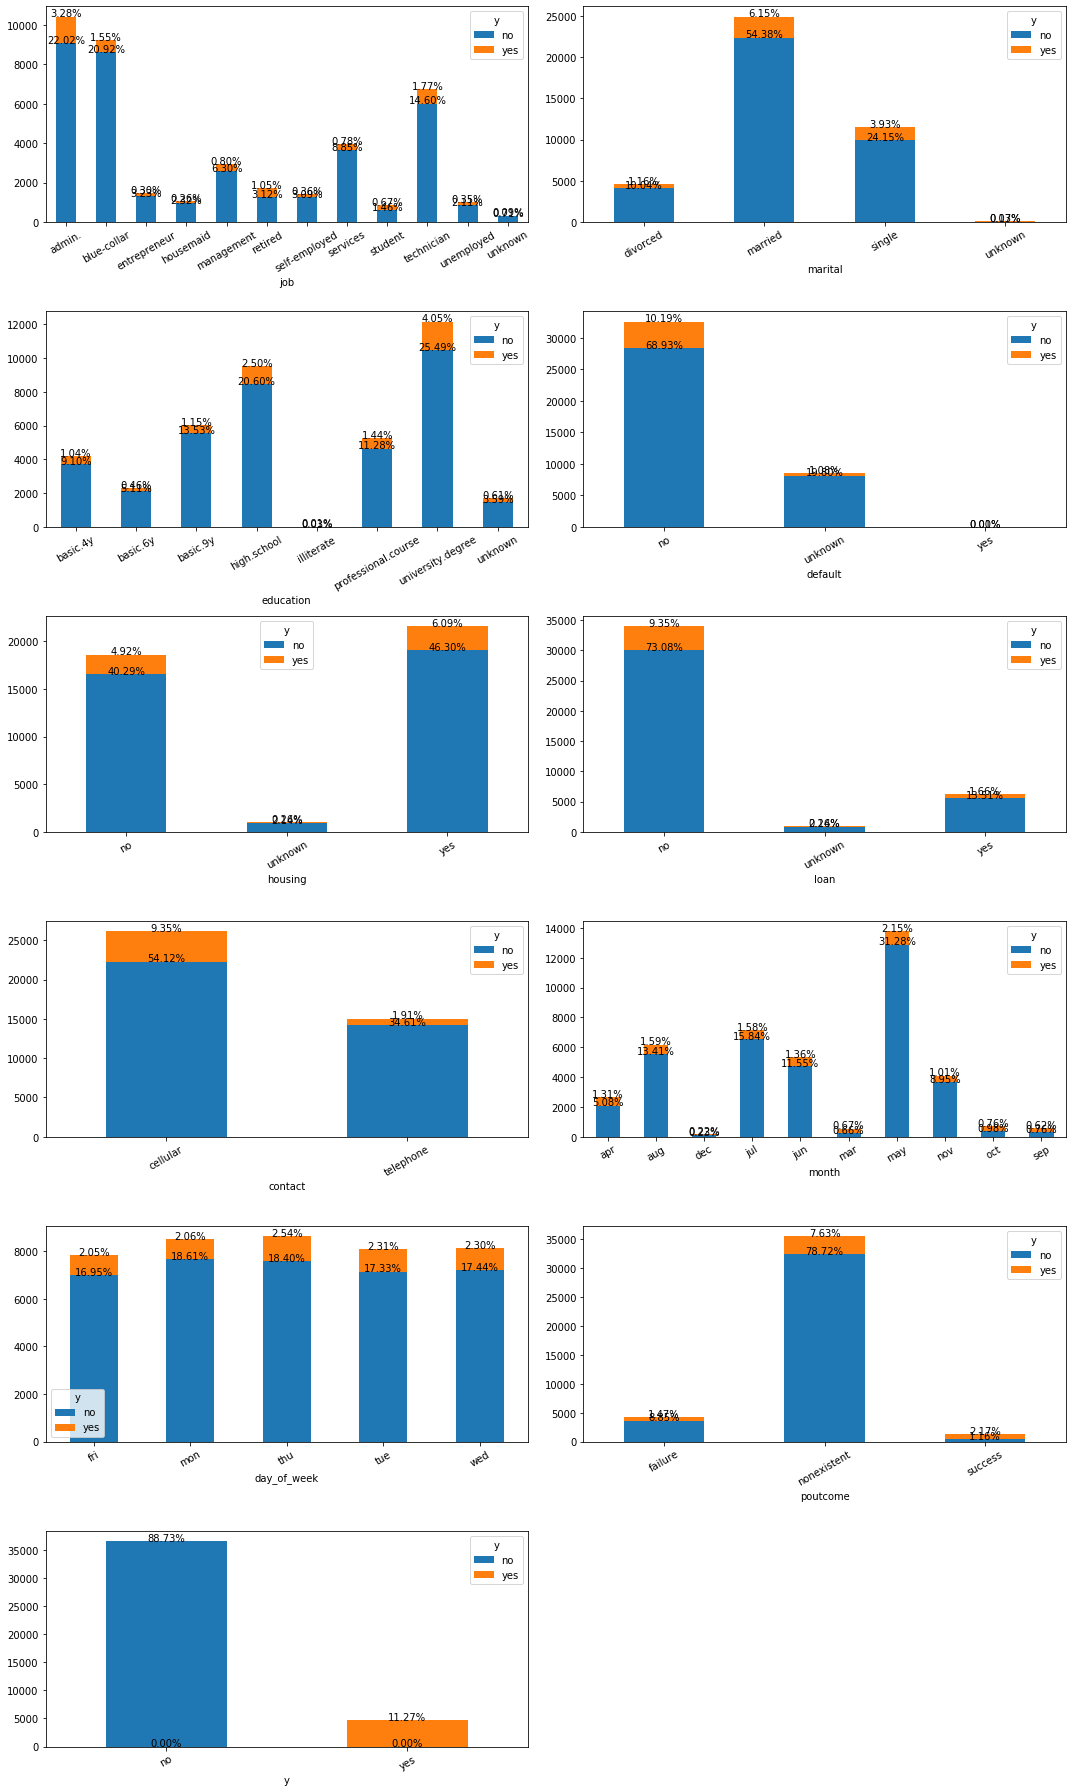

In [12]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

n = len(data.select_dtypes(include='object').columns)
i = 0
for obj in data.select_dtypes(include='object'):
    ax = plt.subplot(6,2,i+1)
    data.groupby([obj, 'y']).size().unstack().plot(kind='bar', stacked=True, ax=ax,figsize=(15,25))
    plt.xticks(rotation=30)
    # Show percentage on top of each bar
    for p in ax.patches:
        ax.text(p.get_x()+p.get_width()/2.,
                p.get_y()+p.get_height()-1,
                '{:.2f}%'.format(100 * p.get_height()/len(data)),
                ha="center")
    i += 1
plt.tight_layout()
plt.show()

Buat *correlation matrix* pada data-data numerik untuk melihat korelasi variabel satu sama lain.

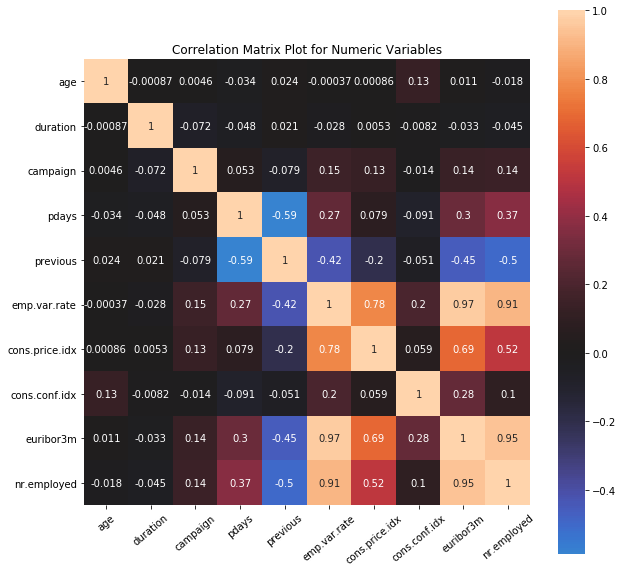

In [13]:
%matplotlib inline
plt.figure(figsize=(10, 10))
sns.heatmap(data.select_dtypes(include='number').corr(), cbar=True, square=True, annot=True, center=0)
plt.xticks(rotation=40)
plt.title('Correlation Matrix Plot for Numeric Variables')
plt.show()

Berdasarkan hasil eksplorasi data di atas, diperoleh temuan-temuan sebagai berikut.
1. Data memiliki 21 variabel (20 variabel *input* dan 1 variabel *output*) dengan 41188 entri.
2. Variabel-variabel kategori pada DataFrame memiliki tipe data berupa *object*.
3. Beberapa variabel memiliki *unknown values* di bawah 5% ('job', 'marital', 'education', 'housing', 'loan'). Sedangkan, variabel 'default' memiliki *unknown values* yang tidak sedikit, yakni 20,87% dari keseluruhan data.
4. Terdapat 12 entri yang terduplikasi.
5. Variabel-variabel numerik yang ada tidak terdistribusi normal.
6. Pada variabel 'duration', proporsi nasabah yang mengatakan 'yes' pada variabel 'y' meningkat seiring peningkatan pada variabel 'duration'.
7. Variabel 'pdays' memiliki distribusi *left skew*, dengan *outliers* di bawah 250 tetapi semuanya mengatakan 'yes' pada variabel 'y'. Hal ini mengindikasikan bahwa mayoritas nasabah belum pernah dihubungi pihak bank pada *marketing campaign* sebelumnya, yang ditandai dengan banyaknya data terpusat mendekati 1000 dan kuartil-1 sebesar 999.
8. Terdapat ketimpangan yang cukup signifikan pada data variabel yang hendak diprediksi ('y'), di mana proporsi 'yes' dengan 'no' sebesar 11,27% dengan 88,73%.
9. Terdapat variabel-variabel yang memiliki nilai korelasi sangat tinggi (> 0.90) dengan lainnya, yaitu: 'emp.var.rate' dengan 'euribor3m', 'emp.var.rate' dengan 'nr.employed', dan 'euribor3m' dengan 'nr.employed'. Selain itu, terdapat variabel-variabel dengan nilai korelasi 0.50-0.90, yakni: 'cons.price.idx' dengan 'emp.var.rate', 'cons.price.idx' dengan 'euribor3m', 'cons.price.idx' dengan 'nr.employed'.

# *Data Preparation*

Buang entri data yang terduplikasi.

In [14]:
data_prep = data.drop_duplicates()
data_prep.shape

(41176, 21)

Berdasarkan *correlation matrix*, 'emp.var.rate' dan 'euribor3m' memiliki korelasi yang cukup tinggi (di atas 0.6) dengan setidaknya 3 variabel lain. Oleh sebab itu, kedua variabel ini dapat dibuang.

In [15]:
data_prep.drop(['emp.var.rate','euribor3m'], axis=1, inplace=True)

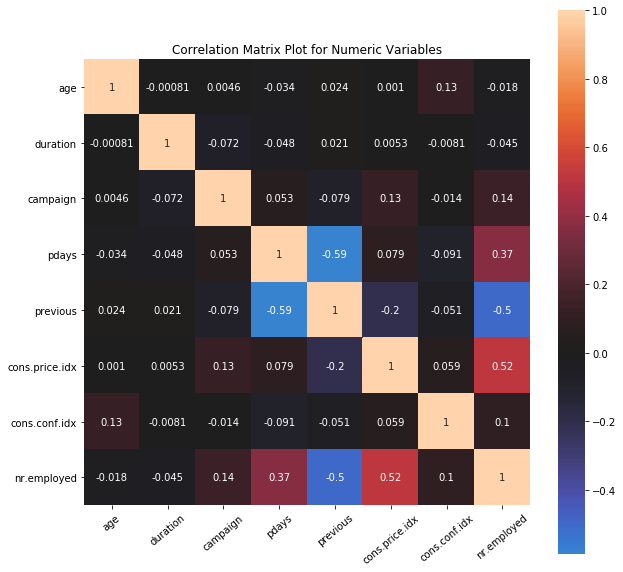

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  cons.price.idx  41176 non-null  float64
 16  cons.conf.idx   41176 non-null  float64
 17  nr.employed     41176 non-null 

In [16]:
%matplotlib inline
plt.figure(figsize=(10, 10))
sns.heatmap(data_prep.select_dtypes(include='number').corr(), cbar=True, square=True, annot=True, center=0)
plt.xticks(rotation=40)
plt.title('Correlation Matrix Plot for Numeric Variables')
plt.show()
data_prep.info()

Ubah data numerik sedemikian rupa sehingga memiliki *range* antara nol dan satu.

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,0.284244,0.052525,0.028507,0.963428,0.024716,0.535744,0.430843,0.769130
std,0.128650,0.052726,0.050369,0.187124,0.070709,0.225580,0.193634,0.273162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185185,0.020740,0.000000,1.000000,0.000000,0.340608,0.338912,0.512287
50%,0.259259,0.036600,0.018182,1.000000,0.000000,0.603274,0.376569,0.859735
75%,0.370370,0.064864,0.036364,1.000000,0.000000,0.698753,0.602510,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


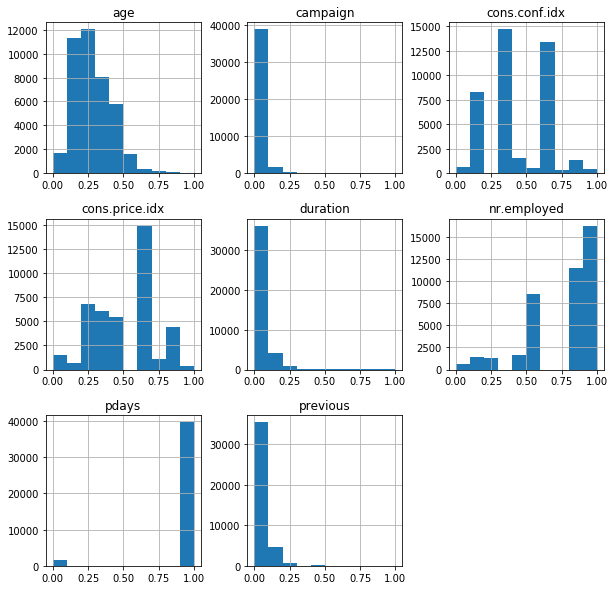

In [17]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
col = data_prep.select_dtypes(include='number').columns.tolist()
data_prep[col] = sc.fit_transform(data_prep[col])
data_prep.hist(figsize=(10,10))
data_prep.describe()

Variabel-variabel bertipe *object* di-*encode*.

In [18]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import numpy as np

# Encode the features
oe = OrdinalEncoder(dtype=np.uint8)
col = data_prep.drop(['y'],axis=1).select_dtypes(include='object').columns.tolist()
data_prep[col] = oe.fit_transform(data_prep[col])

# Encode the label in y column
le = LabelEncoder()
data_prep['y'] = le.fit_transform(data_prep['y'])

data_prep.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y
0,0.481481,3,1,0,0,0,0,1,6,1,0.053070,0.0,1.0,0.0,1,0.698753,0.60251,0.859735,0
1,0.493827,7,1,3,1,0,0,1,6,1,0.030297,0.0,1.0,0.0,1,0.698753,0.60251,0.859735,0
2,0.246914,7,1,3,0,2,0,1,6,1,0.045954,0.0,1.0,0.0,1,0.698753,0.60251,0.859735,0
3,0.283951,0,1,1,0,0,0,1,6,1,0.030704,0.0,1.0,0.0,1,0.698753,0.60251,0.859735,0
4,0.481481,7,1,3,0,0,2,1,6,1,0.062424,0.0,1.0,0.0,1,0.698753,0.60251,0.859735,0


In [19]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  float64
 1   job             41176 non-null  int64  
 2   marital         41176 non-null  int64  
 3   education       41176 non-null  int64  
 4   default         41176 non-null  int64  
 5   housing         41176 non-null  int64  
 6   loan            41176 non-null  int64  
 7   contact         41176 non-null  int64  
 8   month           41176 non-null  int64  
 9   day_of_week     41176 non-null  int64  
 10  duration        41176 non-null  float64
 11  campaign        41176 non-null  float64
 12  pdays           41176 non-null  float64
 13  previous        41176 non-null  float64
 14  poutcome        41176 non-null  int64  
 15  cons.price.idx  41176 non-null  float64
 16  cons.conf.idx   41176 non-null  float64
 17  nr.employed     41176 non-null 

Lalu, pisahkan *features* dan *label* dan pisahkan juga data *training*, *testing*, dan *validation* dengan perbandingan 70% dan 30%.

In [20]:
X_data = data_prep.iloc[:,:-1]
y_data = data_prep.iloc[:,-1:]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=123, stratify=y_data)

In [22]:
X_train.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed
31748,0.222222,1,1,0,0,2,2,0,6,2,0.039650,0.000000,1.0,0.0,1,0.269680,0.192469,0.512287
26671,0.148148,9,2,5,1,2,0,0,7,2,0.048597,0.000000,1.0,0.0,1,0.389322,0.368201,0.877883
39007,0.481481,4,1,5,0,0,0,0,2,4,0.025214,0.000000,1.0,0.0,1,0.199532,0.744770,0.226465
30262,0.481481,2,1,6,0,0,0,0,0,2,0.017283,0.000000,1.0,0.0,1,0.340608,0.154812,0.512287
16695,0.074074,7,2,3,0,1,1,0,3,4,0.264335,0.036364,1.0,0.0,1,0.669135,0.338912,1.000000
14490,0.209877,0,2,6,0,0,0,0,3,3,0.012403,0.054545,1.0,0.0,1,0.669135,0.338912,1.000000
31712,0.222222,9,2,5,0,2,0,0,6,2,0.009963,0.000000,1.0,0.0,1,0.269680,0.192469,0.512287
9834,0.308642,4,1,6,0,0,0,1,4,4,0.040057,0.036364,1.0,0.0,1,0.882307,0.376569,1.000000
24991,0.172840,2,0,0,0,0,0,0,7,3,0.030907,0.018182,1.0,0.0,1,0.389322,0.368201,0.877883
36695,0.172840,10,0,7,0,2,0,0,4,0,0.046157,0.000000,1.0,0.0,1,0.296960,0.418410,0.425709


# *Modeling*

*Predictive model* yang akan digunakan pada data ini adalah Support Vector Machines (SVM), Stochastic Gradient Descent (SGD), Random Forest, dan Extreme Gradient Boosting (XGBoost). Pada pemodelan ini dihitung pembobotan masing-masing kelas pada variabel 'y' mengingat ketimpangan data yang signifikan.

In [23]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

weight = y_train.groupby(['y']).size()[0]/y_train.groupby(['y']).size()[1] # Class weight for XGBoost scale_pos_weight
model_list = {'SVM':SVC(class_weight='balanced'), 
              'SGD':SGDClassifier(loss='log', class_weight='balanced'),
              'Random Forest':RandomForestClassifier(class_weight='balanced'),
              'XGBoost':XGBClassifier(scale_pos_weight=weight,n_jobs=-1)}

for model_name, model in model_list.items():
    model.fit(X_train, y_train)
    print(model_name,'model training: done!')
    model_list[model_name] = model

SVM model training: done!
SGD model training: done!
Random Forest model training: done!
XGBoost model training: done!


# *Evaluation*

Model akan dievaluasi performanya. Selain itu, dicari juga *feature* mana saja yang memiliki pengaruh pada model yang dibuat. Mengingat data memiliki ketimpangan yang cukup signifikan, *metric* yang digunakan untuk mengevaluasi model adalah ROC *curve*, ROC AUC, *confusion matrix*, dan *balanced accuracy*.

ROC *curve* digunakan untuk melihat hubungan antara *sensitivity*/*recall* dengan *specificity* pada *threshold* tertentu. ROC AUC mengukur bagaimana model dapat memisahkan dua kelas yang berbeda (*separability*). *Balanced accuracy* menghitung akurasi model pada data yang timpang.

Buat ROC *curve* dan hitung ROC AUC.

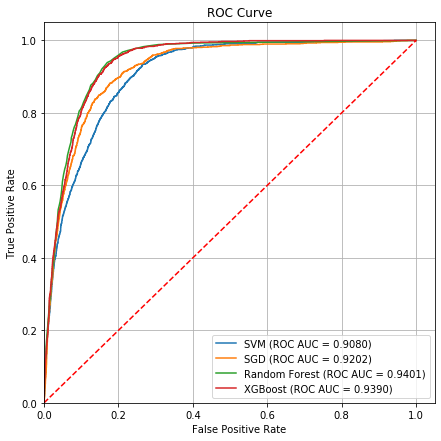

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve

# ROC Curve
plt.figure(figsize=(7,7))
for model_name, model in model_list.items():
    if model_name == 'SVM':
        fpr, tpr, th = roc_curve(y_test, model.decision_function(X_test))
        roc_auc = roc_auc_score(y_test, model.decision_function(X_test))
        plt.plot(fpr,tpr,label=model_name+' (ROC AUC = %.4f)' % roc_auc)
    else:
        fpr, tpr, th = roc_curve(y_test, model.predict_proba(X_test)[:,1])
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
        plt.plot(fpr,tpr,label=model_name+' (ROC AUC = %.4f)' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1.05])
plt.ylim([0,1.05])
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()

Buat *confusion matrix* dan hitung *balanced accuracy*.

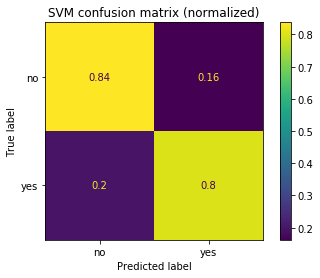

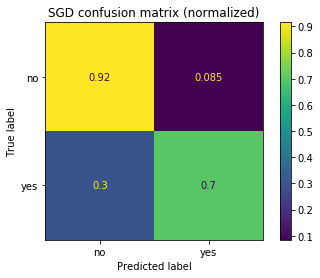

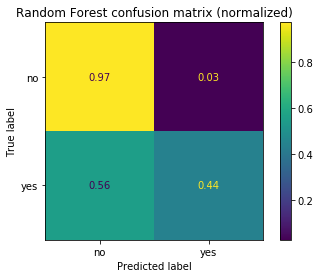

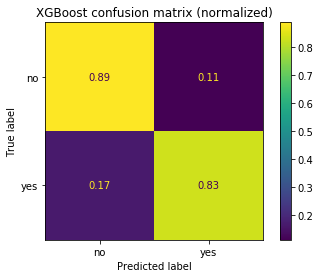

In [25]:
from sklearn.metrics import plot_confusion_matrix, balanced_accuracy_score

idx = []
bacc_scores = []

for model_name, model in model_list.items():
    # Normalized confusion matrix
    plot_confusion_matrix(model, X_test, y_test,
                          display_labels=['no','yes'],
                          normalize='true')
    plt.title(model_name + ' confusion matrix (normalized)')
    
    idx.append(model_name)
    bacc_scores.append(balanced_accuracy_score(y_test,model.predict(X_test)))
plt.show()

In [26]:
pd.DataFrame(list(zip(bacc_scores)),index=idx,columns=['Balanced Accuracy'])

,Balanced Accuracy
SVM,0.820070
SGD,0.808288
Random Forest,0.705852
XGBoost,0.860832


Nilai ROC AUC semua model sangat baik (di atas 0,9), di mana Random Forest dan XGBoost merupakan dua model yang memiliki nilai ROC AUC tertinggi dan berselisih sedikit. Karena belum mendapat kesimpulan model manakah yang terbaik, maka digunakan *metric* berupa *confusion matrix* dan *balanced accuracy*. Berdasarkan *confusion matrix*, Random Forest memiliki indikasi *overfitting* pada satu kelas, di mana Random Forest ini dapat memprediksi nilai 'no' dengan sangat baik (0,97) namun buruk saat memprediksi nilai 'yes' (0,44). XGBoost memperoleh nilai tertinggi pada *balanced accuracy* (0,861) serta dapat memprediksi nilai 'no' dan 'yes' dengan baik (0,89 dan 0,83). Sehingga, jawaban pertanyaan pertama pada *Business Understanding* untuk memilih *predictive model* paling baik adalah menggunakan model **XGBoost**.

Selanjutnya, dilakukan *hyperparameter tuning* pada XGBoost untuk memperoleh model paling optimal. 

In [27]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

cross_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
param = {'max_depth': [4,5,6,7,8,9,10],
         'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0,3],
         'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
         'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
         'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
         'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.5, 10.0, 12.0],
         'gamma': [0, 0.1, 0.25, 0.5, 1.0],
         'reg_alpha': [0, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0],
         'reg_lambda': [0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0],
         'n_estimators': [50,100,150,200,250,300]}

randomized_search = RandomizedSearchCV(model_list['XGBoost'], param, n_iter=30,
                                       n_jobs=-1, cv=cross_val,
                                       scoring='balanced_accuracy', random_state=123)
randomized_search.fit(X_train, y_train)
randomized_search.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=7,
              min_child_weight=12.0, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0.1,
              reg_lambda=50.0, scale_pos_weight=7.8768093624884505,
              subsample=0.6, tree_method=None, validate_parameters=False,
              verbosity=None)

Setelah itu, *train* model yang telah dioptimasi dan tampilkan *evaluation metric* untuk memastikan bahwa model yang telah dioptimasi ini memiliki performa yang lebih baik dibanding model sebelumnya.

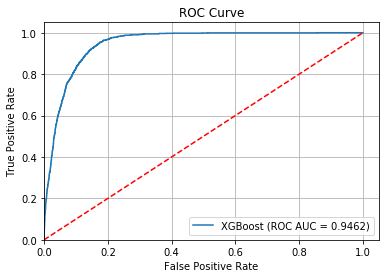

XGBoost balanced accuracy:  0.8861913240989212


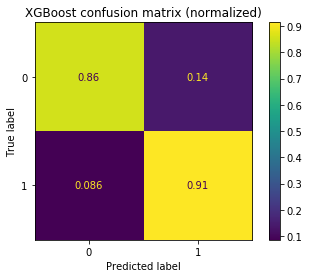

In [28]:
# Train the optimal XGBoost model
best_mod = randomized_search.best_estimator_
best_mod.fit(X_train,y_train)
y_pred = best_mod.predict(X_test)

# ROC Curve
fpr, tpr, th = roc_curve(y_test, best_mod.predict_proba(X_test)[:,1])
roc_auc = roc_auc_score(y_test, best_mod.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label='XGBoost (ROC AUC = %.4f)' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1.05])
plt.ylim([0,1.05])
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()

# Normalized confusion matrix
plot_confusion_matrix(best_mod, X_test, y_test, normalize='true')
plt.title('XGBoost confusion matrix (normalized)')

#Balanced accuracy
print('XGBoost balanced accuracy: ',balanced_accuracy_score(y_test,y_pred))

Terdapat *improvement* yang cukup baik dari hasil *hyperparameter tuning* XGBoost untuk memperoleh model yang optimal. ROC AUC dan *balanced accuracy* meningkat menjadi 0,946 dan 0,886. Selain itu, model ini dapat memprediksi nilai 'yes' dan 'no' dengan baik (0,91 dan 0,86).

Untuk menjawab pertanyaan kedua pada *Business Understanding* mengenai variabel-variabel yang relevan pada pemodelan, akan dicari *feature importance* dari model yang telah dibuat.

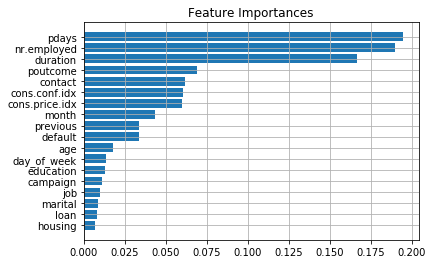

In [29]:
plt.grid(True)
plt.barh(list(X_train.columns.values[best_mod.feature_importances_.argsort()]), 
         best_mod.feature_importances_[best_mod.feature_importances_.argsort()])
plt.title("Feature Importances")
plt.show()

Terdapat 5 besar variabel penting yang mempengaruhi iya-tidaknya nasabah berinvestasi pada deposito berjangka, yaitu: **'pdays'**, **'nr.employed'**, **'duration'**, **'poutcome'**, dan **'contact'**. Variabel 'pdays' berkaitan dengan jumlah hari berlalu setelah nasabah terakhir dihubungi, 'nr.employed' berkaitan dengan banyaknya pekerja (berhubungan terbalik dengan tingkat pengangguran), 'duration' berkaitan dengan lamanya panggilan saat nasabah dihubungi, 'poutcome' berkaitan dengan hasil *marketing campaign* sebelumnya, 'contact' berhubungan dengan media komunikasi yang digunakan untuk menghubungi nasabah. Variabel-variabel ini harus diperhatikan oleh pihak bank dalam merencanakan strategi pemasaran deposito berjangka ini atau pemasaran produk lainnya kepada nasabah. Perlu diingat juga bahwa variabel 'nr.employed' memiliki korelasi yang tinggi dengan variabel 'emp.var.rate' dan 'euribor3m', sehingga kedua variabel ini tak luput untuk ditinjau oleh pihak bank.

# *Deployment*

Pada tahap ini, hasil pemodelan di atas dibuatkan sebuah program sederhana untuk memprediksi iya-tidaknya nasabah berinvestasi berdasarkan variabel-variabel *input* data awal. Selain itu, *final report* hasil laporan akhir analisis data disajikan dalam wujud Jupyter Notebook ini.

In [30]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

def predict_yes_or_no_to_subscribe(dataset):
    # Data preparation
    # Drop duplicates
    dataset = dataset.drop_duplicates()
    
    # Delete columns that have high cross-correlation
    dataset.drop(['emp.var.rate','euribor3m'], axis=1, inplace=True)
    
    # Rescale the numeric columns
    num = dataset.select_dtypes(include='number').columns.tolist()
    dataset[num] = sc.transform(dataset[num])
    
    # Encode the categorical columns
    obj = dataset.select_dtypes(include='object').columns.tolist()
    dataset[obj] = oe.transform(dataset[obj])
    
    # Predict
    idx = 0
    for result in best_mod.predict(dataset):
        if result == 0:
            print('Client ',dataset.index[idx],' is predicted will not subscribe.')
        else:
            print('Client ',dataset.index[idx],' is predicted will subscribe.')
        idx += 1

Buat data sintetik dari data yang telah ada sebagai berikut.

In [31]:
data_new = data.drop(['y'],axis=1)

n_ppl = 20 # Determine how many synthetic data to generate
data_syn = pd.DataFrame()
for col in data_new.columns:
    data_syn = pd.concat([data_syn, data_new[col].sample(n=n_ppl).to_frame().reset_index().drop(['index'],axis=1)],
                         axis=1)
data_syn

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,blue-collar,married,high.school,no,yes,no,telephone,jun,wed,1348,2,999,0,nonexistent,-0.1,93.444,-42.7,4.964,5228.1
1,57,retired,single,university.degree,no,yes,no,cellular,jul,wed,175,1,999,0,nonexistent,-2.9,93.918,-42.0,1.334,5099.1
2,52,technician,divorced,basic.9y,no,yes,no,telephone,nov,mon,123,5,999,0,nonexistent,-0.1,92.963,-46.2,4.153,5228.1
3,39,management,married,basic.4y,no,no,no,cellular,may,fri,607,6,999,0,nonexistent,-0.1,94.465,-41.8,4.962,5228.1
4,36,housemaid,single,high.school,no,no,no,cellular,apr,fri,401,1,999,0,nonexistent,-0.1,92.893,-41.8,4.967,5099.1
5,40,technician,married,unknown,unknown,yes,no,cellular,may,mon,849,4,999,1,nonexistent,1.1,93.369,-36.1,1.266,5099.1
6,71,management,single,basic.9y,no,yes,no,cellular,may,wed,84,4,999,0,nonexistent,1.4,94.465,-46.2,4.864,5195.8
7,33,management,married,university.degree,no,yes,no,cellular,nov,fri,60,2,999,0,nonexistent,1.1,93.994,-42.0,4.120,5228.1
8,39,admin.,married,basic.9y,no,no,no,telephone,jul,thu,566,2,999,0,nonexistent,-0.1,93.918,-36.4,4.963,5228.1
9,34,admin.,married,high.school,unknown,yes,no,telephone,aug,wed,230,1,999,0,nonexistent,-1.8,94.465,-41.8,4.864,5228.1


Lalu, prediksi data sintetik yang dibuat dengan program sederhana yang telah dibuat.

In [32]:
predict_yes_or_no_to_subscribe(data_syn)

Client  0  is predicted will subscribe.
Client  1  is predicted will not subscribe.
Client  2  is predicted will not subscribe.
Client  3  is predicted will subscribe.
Client  4  is predicted will not subscribe.
Client  5  is predicted will subscribe.
Client  6  is predicted will not subscribe.
Client  7  is predicted will not subscribe.
Client  8  is predicted will not subscribe.
Client  9  is predicted will not subscribe.
Client  10  is predicted will not subscribe.
Client  11  is predicted will subscribe.
Client  12  is predicted will not subscribe.
Client  13  is predicted will not subscribe.
Client  14  is predicted will not subscribe.
Client  15  is predicted will not subscribe.
Client  16  is predicted will subscribe.
Client  17  is predicted will not subscribe.
Client  18  is predicted will subscribe.
Client  19  is predicted will not subscribe.
